In [1]:
import time
import sys
sys.path.append("..")

from src.data_loader import DataLoader
from src.models import model_parameters
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Load dataset
dl = DataLoader(random_state=42)

# Due to the limited amount of memory and time available, choose models that you want to compare - uncomment the ones you want
print(f'All models: {list(model_parameters.keys())}')
models_to_compare = [
    'random_forest',
    'xgboost', 
    # 'light_gbm', 
    # 'catboost', 
    # 'logistic_regression',
    'decision_tree',
    ]
models= {name: model_parameters[name] for name in models_to_compare}
models

All models: ['random_forest', 'xgboost', 'light_gbm', 'catboost', 'logistic_regression', 'decision_tree']


{'random_forest': {'model': <src.models.ensemble_random_forest.RandomForestModel at 0x1c9e8d600a0>,
  'scaled': False},
 'xgboost': {'model': <src.models.ensemble_xgboost.XGBoostModel at 0x1c9e8e2d7b0>,
  'scaled': False},
 'decision_tree': {'model': <src.models.baseline_decision_tree.DecisionTreeModel at 0x1c9e8f13100>,
  'scaled': False}}

Current model: random_forest
              precision    recall  f1-score   support

   Extrovert       0.94      0.94      0.94       282
   Introvert       0.92      0.93      0.92       221

    accuracy                           0.93       503
   macro avg       0.93      0.93      0.93       503
weighted avg       0.93      0.93      0.93       503



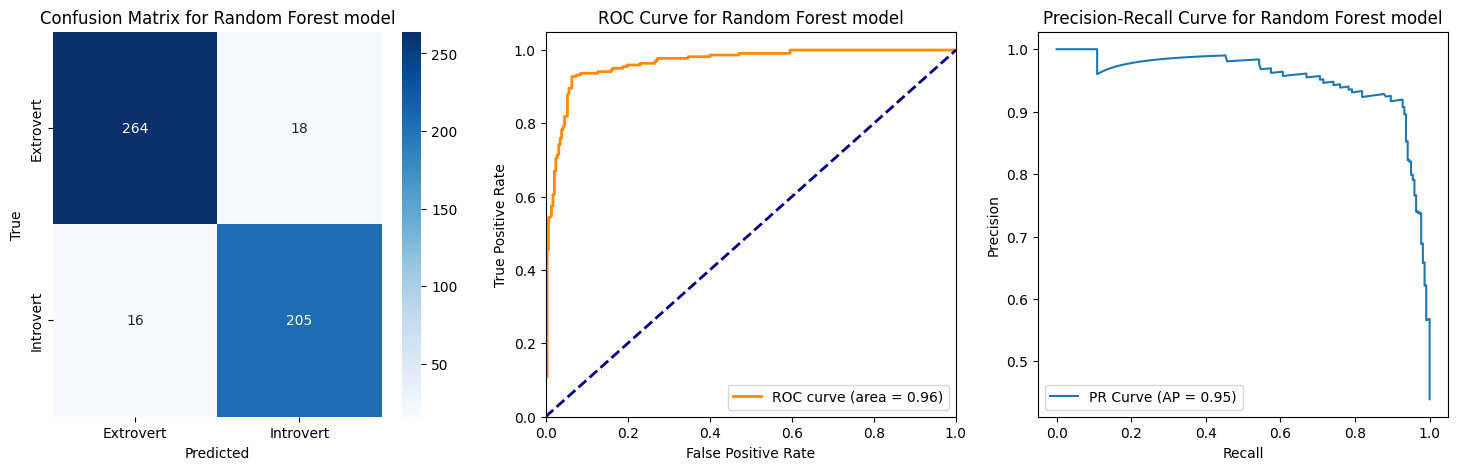

Time: 9.40 [s]
Current model: xgboost
              precision    recall  f1-score   support

   Extrovert       0.94      0.94      0.94       282
   Introvert       0.92      0.92      0.92       221

    accuracy                           0.93       503
   macro avg       0.93      0.93      0.93       503
weighted avg       0.93      0.93      0.93       503



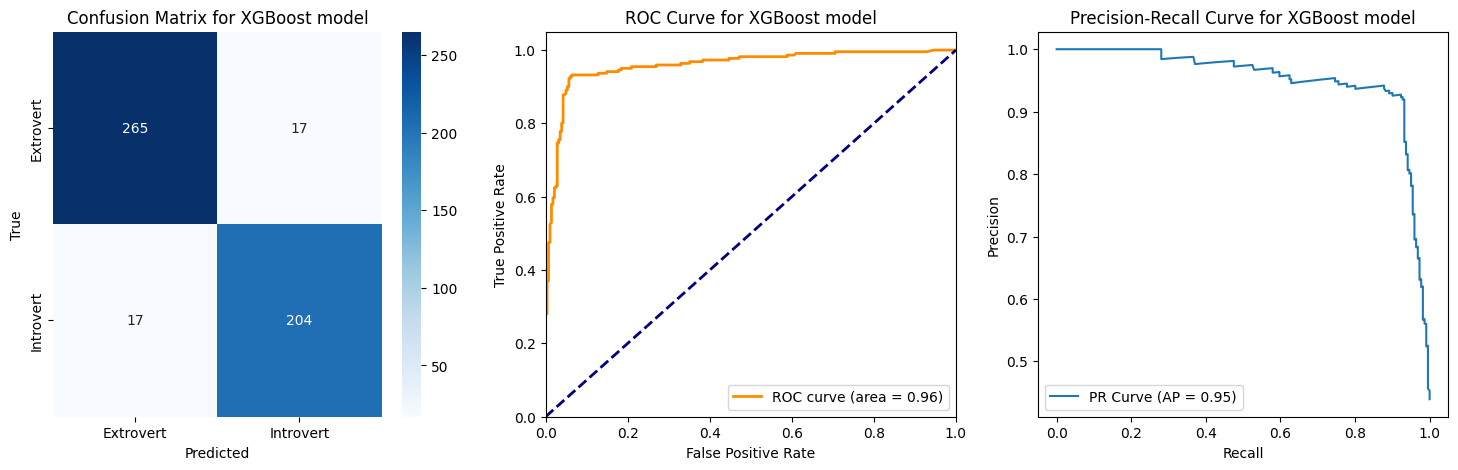

Time: 2.50 [s]
Current model: decision_tree
              precision    recall  f1-score   support

   Extrovert       0.94      0.94      0.94       282
   Introvert       0.92      0.93      0.93       221

    accuracy                           0.93       503
   macro avg       0.93      0.93      0.93       503
weighted avg       0.93      0.93      0.93       503



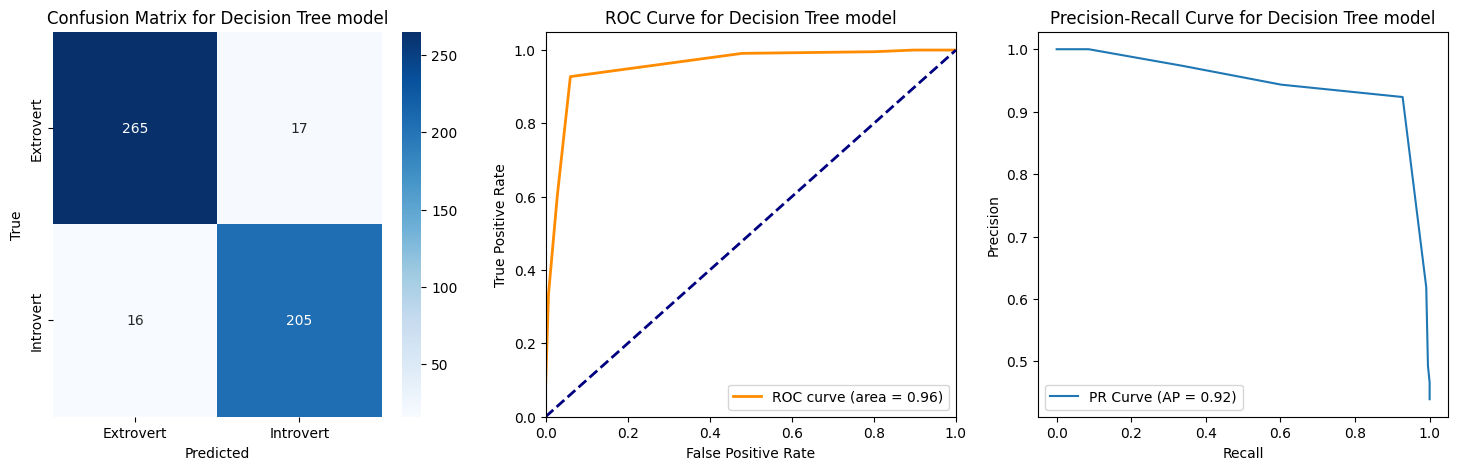

Time: 0.53 [s]


In [2]:
results = []
for name, config in models.items():
    print(f'Current model: {name}')
    X_train, X_test, y_train, y_test = dl.get_data_train_test(scaled=config['scaled'], test_size=0.2)

    model = config['model']
    t0 = time.time()
    model.train(X_train, y_train)
    metrics = model.evaluate(X_test, y_test, verbose = True)
    et = round(time.time() - t0, 2)
    results.append({
        'model': name,
        'execution_time': et,
        **metrics,
        'best_score': model.model.best_score_,
        'best_params': model.model.best_params_
    })
    print(f'Time: {et:.2f} [s]')
    print('=====================')

df_results = pd.DataFrame(results).sort_values(by=["accuracy", "auc", "ap"], ascending=False).reset_index(drop=True)

In [3]:
df_results

,model,execution_time,accuracy,auc,ap,best_score,best_params
0,decision_tree,0.53,0.934394,0.956131,0.924489,0.926448,"{'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'log_loss', 'ccp_alpha': 0.0}"
1,random_forest,9.40,0.932406,0.964322,0.952618,0.925953,"{'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 10}"
2,xgboost,2.50,0.932406,0.958177,0.952295,0.925946,"{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01}"
